In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [3]:
!pip install tensorflow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import tensorflow as tf

In [7]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
import cv2
import os
import imghdr
from matplotlib import pyplot as plt
import shutil

In [13]:
img=cv2.imread(os.path.join('/content/drive/MyDrive/dr_dataset1/DR/1000.jpg'))
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

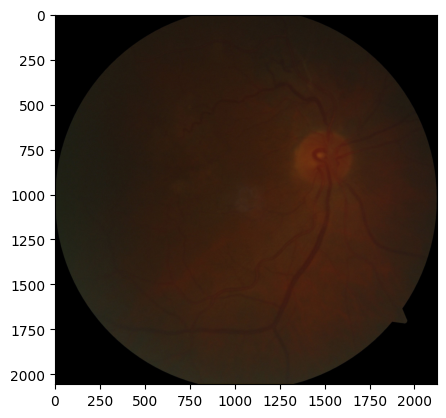

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
data_dir = "/content/drive/MyDrive/dr_dataset1"

In [20]:
import numpy as np

In [24]:
!ls /content/drive/MyDrive/dr_dataset1

DR  No_DR


In [25]:
data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/dr_dataset1")

Found 1428 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

In [28]:
batch[0].shape

(32, 256, 256, 3)

In [29]:
# LABELS: 1-DIabetic Retinopathy 0-Diabetic Macular Edema
batch[1]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

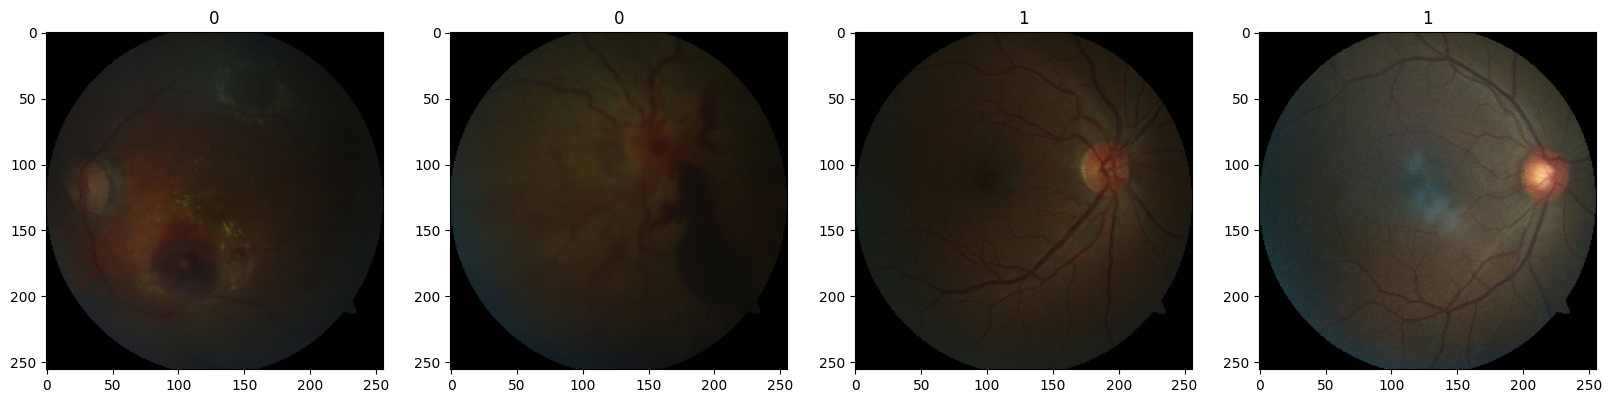

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [31]:
data = data.map(lambda x,y: (x/255,y))

In [32]:
scaled_iterator = data.as_numpy_iterator()

In [33]:
batch = scaled_iterator.next()

In [34]:
batch[0].max()

1.0

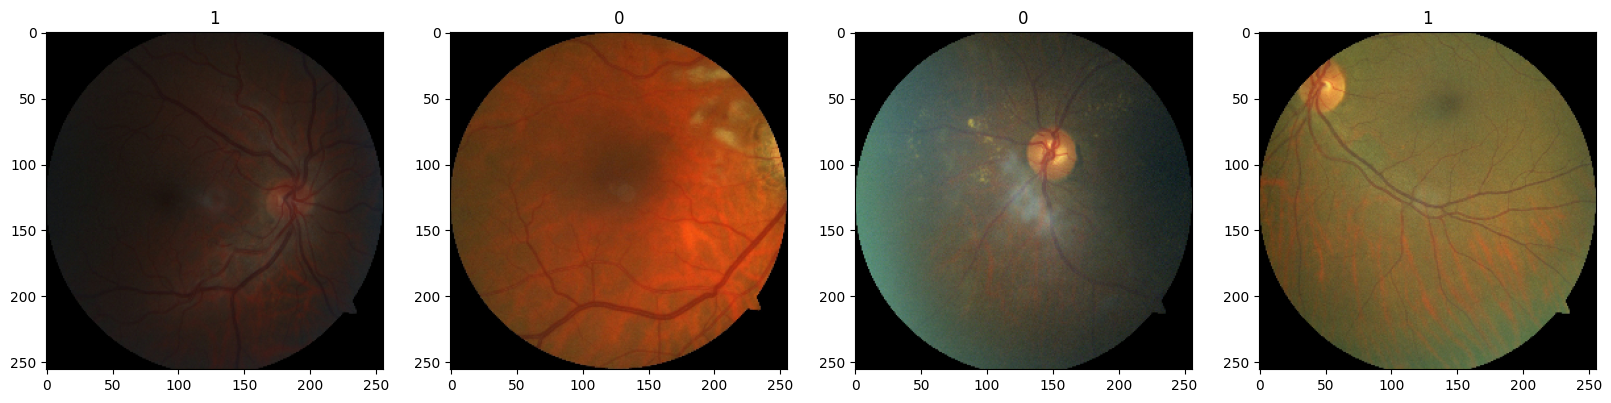

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [36]:
len(data)

45

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)* .2)
test_size = int(len(data)*.1)+1

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [39]:
print(train_size, val_size, test_size)

31 9 5


In [40]:
len(test)

5

In [41]:
import tensorflow as tf
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import Model
from tensorflow.keras import regularizers

In [42]:
model = tf.keras.Sequential([
        Conv2D(64, kernel_size=(2, 2), strides=(2, 2), activation='relu', input_shape=(256,256,3)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(16, kernel_size=(2, 2), activation='relu', padding='same'),
        Conv2D(16, kernel_size=(2, 2), activation='relu', padding='same'),
        Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        Dense(1, activation='sigmoid'),
])

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2064      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        1

In [45]:
model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
31/31 [==============================] - 329s 10s/step - loss: 1.9844 - accuracy: 0.4778 - precision: 0.4764 - recall: 0.6427 - val_loss: 0.9008 - val_accuracy: 0.4965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
31/31 [==============================] - 135s 4s/step - loss: 0.7791 - accuracy: 0.4859 - precision: 0.4656 - recall: 0.3053 - val_loss: 0.7135 - val_accuracy: 0.5139 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
31/31 [==============================] - 134s 4s/step - loss: 0.7024 - accuracy: 0.4869 - precision: 0.4509 - recall: 0.2074 - val_loss: 0.6947 - val_accuracy: 0.5243 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
31/31 [==============================] - 133s 4s/step - loss: 0.6949 - accuracy: 0.4950 - precision: 0.4911 - recall: 0.2213 - val_loss: 0.6936 - val_accuracy: 0.4931 - val_precision: 0.4931 - val_recall: 1.0000
Epoch 5/20
31/31 [==============================] - 134s 4s/step - loss: 0.6935 - a

In [47]:
model.evaluate(test)

5/5 [==============================] - 61s 180ms/step - loss: 0.6933 - accuracy: 0.4595 - precision: 0.4595 - recall: 1.0000


[0.6933221817016602, 0.45945945382118225, 0.45945945382118225, 1.0]